# Project_FIFA_MoneyBall

In [85]:
!pip install plotly

     |████████████████████████████████| 20.6 MB 1.1 MB/s eta 0:00:01    |█▏                              | 757 kB 1.7 MB/s eta 0:00:12     |██████████████████████▌         | 14.4 MB 1.4 MB/s eta 0:00:05


### Importing the necessary libraries

In [97]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import plotly.express as px
import sklearn.metrics as metrics

from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA

from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from matplotlib import colors as mcolors

pd.options.display.max_columns = None
pd.options.display.max_rows = None

import warnings
warnings.filterwarnings('ignore')

## Importing the data

In [294]:
df = pd.read_csv('/Users/spicasumampouw/IronSpica/project/Project_FIFA_MoneyBall/Data/fifa21_male2.csv')

## Review, and we will be trying to understand the data in the following steps.

In [99]:
df.head()
#df.tail()

ID         Name  Age  OVA            Nationality           Club  BOV   BP  \
0   2  G. Pasquale   33   69                  Italy        Udinese   71  LWB   
1  16  Luis García   37   71                  Spain      KAS Eupen   70   CM   
2  27      J. Cole   33   71                England  Coventry City   71  CAM   
3  36     D. Yorke   36   68  Trinidad &amp; Tobago     Sunderland   70   ST   
4  41      Iniesta   36   81                  Spain    Vissel Kobe   82  CAM   

       Position                                       Player Photo  \
0            LM  https://cdn.sofifa.com/players/000/002/16_120.png   
1    CM CAM CDM  https://cdn.sofifa.com/players/000/016/19_120.png   
2  CAM RM RW LM  https://cdn.sofifa.com/players/000/027/16_120.png   
3           NaN  https://cdn.sofifa.com/players/000/036/09_120.png   
4        CM CAM  https://cdn.sofifa.com/players/000/041/20_120.png   

                                          Club Logo  \
0      https://cdn.sofifa.com/teams/55/light_60.png   
1    https://cdn.sofifa.com/teams/2013/light_60.png   
2    https://cdn.sofifa.com/teams/1800/light_60.png   
3     https://cdn.sofifa.com/teams/106/light_60.png   
4  https://cdn.sofifa.com/teams/101146/light_60.png   

                                Flag Photo  POT            Team & Contract  \
0      https://cdn.sofifa.com/flags/it.png   69        Udinese 2008 ~ 2016   
1      https://cdn.sofifa.com/flags/es.png   71      KAS Eupen 2014 ~ 2019   
2  https://cdn.sofifa.com/flags/gb-eng.png   71  Coventry City 2016 ~ 2020   
3      https://cdn.sofifa.com/flags/tt.png   82            Sunderland 2009   
4      https://cdn.sofifa.com/flags/es.png   81    Vissel Kobe 2018 ~ 2021   

  Height  Weight   foot  Growth        Joined Loan Date End  Value  Wage  \
0   6'0"  181lbs   Left       0   Jul 1, 2008           NaN  €625K   €7K   
1  5'10"  143lbs  Right       0  Jul 19, 2014           NaN  €600K   €7K   
2   5'9"  161lbs  Right       0   Jan 7, 2016           NaN  €1.1M  €15K   
3  5'11"  165lbs  Right      14           NaN           NaN     €0    €0   
4   5'7"  150lbs  Right       0  Jul 16, 2018           NaN  €5.5M  €12K   

  Release Clause     Contract  Attacking  Crossing  Finishing  \
0             €0  2008 ~ 2016        313        75         50   
1          €1.1M  2014 ~ 2019        337        68         64   
2             €0  2016 ~ 2020        337        80         64   
3             €0         2009        264        54         70   
4          €7.2M  2018 ~ 2021        367        75         69   

   Heading Accuracy  Short Passing  Volleys  Skill  Dribbling  Curve  \
0                59             71     58.0    338         73   65.0   
1                61             76     68.0    369         69   79.0   
2                41             77     75.0    387         79   84.0   
3                60             80      NaN    255         68    NaN   
4                54             90     79.0    408         85   80.0   

   FK Accuracy  Long Passing  Ball Control  Movement  Acceleration  \
0           60            69            71       347            68   
1           79            71            71       305            56   
2           77            69            78       295            48   
3           46            64            77       176            59   
4           70            83            90       346            61   

   Sprint Speed  Agility  Reactions  Balance  Power  Shot Power  Jumping  \
0            74     68.0         69     68.0    347          74     68.0   
1            50     62.0         65     72.0    324          75     54.0   
2            42     71.0         59     75.0    284          72     58.0   
3            62      NaN         55      NaN    239          63      NaN   
4            56     79.0         75     75.0    297          67     40.0   

   Stamina  Strength  Long Shots  Mentality  Aggression  Interceptions  \
0       69        68          68        320          72           69

In [4]:
#df.shape
df.dtypes

ID                    int64
Name                 object
Age                   int64
OVA                   int64
Nationality          object
Club                 object
BOV                   int64
BP                   object
Position             object
Player Photo         object
Club Logo            object
Flag Photo           object
POT                   int64
Team & Contract      object
Height               object
Weight               object
foot                 object
Growth                int64
Joined               object
Loan Date End        object
Value                object
Wage                 object
Release Clause       object
Contract             object
Attacking             int64
Crossing              int64
Finishing             int64
Heading Accuracy      int64
Short Passing         int64
Volleys             float64
Skill                 int64
Dribbling             int64
Curve               float64
FK Accuracy           int64
Long Passing          int64
Ball Control        

## Understanding better on basic information in the data. 
#### The relevant features are: 
##### - Name, Age, Nationality: player's name, age and nationality, respectively.
##### - Overall: overall rating for the player
##### - Club: player's club
##### - Value: market value of the player
##### - Wage: player's wage in a monthly basis
##### - Position: natural position of the player
##### - Crossing, Finishing, HeadingAccuracy, ShortPassing, Volleys: attacking attributes
##### - Dribbling, Curve, FKAccuracy, LongPassing, BallControl: skill attributes
##### - Acceleration, SprintSpeed, Agility, Reactions, Balance: movement attributes
##### - ShotPower, Jumping, Stamina, Strength, LongShots: power attributes
##### - Aggression, Interceptions, Positioning, Vision, Penalties, Composure: mentality attributes
##### - Marking, StandingTackle, SlidingTackle: defending attributes
##### - GKDiving, GKHandling, GKKicking, GKPositioning, GKReflexes: goalkeeping attributes

In [295]:
#Scanning and counting missing data values, there are 17 columns with missing values
unk_lst = []
for col in df.columns:
    column_name = col
    unk_values = int(df[col].isnull().sum())
    unk_dtypes = df[col].dtypes
    unk_lst.append([column_name,unk_values,unk_dtypes])
    
unk_df = pd.DataFrame(unk_lst,columns=["Column Name","Unknown Values", "Data Types"])
unk_df.sort_values("Unknown Values",ascending=False).iloc[:20]

Column Name  Unknown Values Data Types
19   Loan Date End           16215     object
54       Composure             423    float64
8         Position             413     object
70             D/W              89     object
69             A/W              89     object
41         Balance              58    float64
18          Joined              58     object
39         Agility              58    float64
52          Vision              58    float64
44         Jumping              58    float64
29         Volleys              58    float64
58  Sliding Tackle              58    float64
32           Curve              58    float64
10       Club Logo              23     object
5             Club              23     object
51     Positioning               7    float64
50   Interceptions               7    float64
73             SHO               0      int64
77             PHY               0      int64
75             DRI               0      int64

## In this step, we are cleaning the data set by dropping irrelevant columns for our purposes.

In [296]:
df.drop(['Loan Date End','Joined','Hits','Gender'],axis=1,inplace=True)
df.head()

ID         Name  Age  OVA            Nationality           Club  BOV   BP  \
0   2  G. Pasquale   33   69                  Italy        Udinese   71  LWB   
1  16  Luis García   37   71                  Spain      KAS Eupen   70   CM   
2  27      J. Cole   33   71                England  Coventry City   71  CAM   
3  36     D. Yorke   36   68  Trinidad &amp; Tobago     Sunderland   70   ST   
4  41      Iniesta   36   81                  Spain    Vissel Kobe   82  CAM   

       Position                                       Player Photo  \
0            LM  https://cdn.sofifa.com/players/000/002/16_120.png   
1    CM CAM CDM  https://cdn.sofifa.com/players/000/016/19_120.png   
2  CAM RM RW LM  https://cdn.sofifa.com/players/000/027/16_120.png   
3           NaN  https://cdn.sofifa.com/players/000/036/09_120.png   
4        CM CAM  https://cdn.sofifa.com/players/000/041/20_120.png   

                                          Club Logo  \
0      https://cdn.sofifa.com/teams/55/light_60.png   
1    https://cdn.sofifa.com/teams/2013/light_60.png   
2    https://cdn.sofifa.com/teams/1800/light_60.png   
3     https://cdn.sofifa.com/teams/106/light_60.png   
4  https://cdn.sofifa.com/teams/101146/light_60.png   

                                Flag Photo  POT            Team & Contract  \
0      https://cdn.sofifa.com/flags/it.png   69        Udinese 2008 ~ 2016   
1      https://cdn.sofifa.com/flags/es.png   71      KAS Eupen 2014 ~ 2019   
2  https://cdn.sofifa.com/flags/gb-eng.png   71  Coventry City 2016 ~ 2020   
3      https://cdn.sofifa.com/flags/tt.png   82            Sunderland 2009   
4      https://cdn.sofifa.com/flags/es.png   81    Vissel Kobe 2018 ~ 2021   

  Height  Weight   foot  Growth  Value  Wage Release Clause     Contract  \
0   6'0"  181lbs   Left       0  €625K   €7K             €0  2008 ~ 2016   
1  5'10"  143lbs  Right       0  €600K   €7K          €1.1M  2014 ~ 2019   
2   5'9"  161lbs  Right       0  €1.1M  €15K             €0  2016 ~ 2020   
3  5'11"  165lbs  Right      14     €0    €0             €0         2009   
4   5'7"  150lbs  Right       0  €5.5M  €12K          €7.2M  2018 ~ 2021   

   Attacking  Crossing  Finishing  Heading Accuracy  Short Passing  Volleys  \
0        313        75         50                59             71     58.0   
1        337        68         64                61             76     68.0   
2        337        80         64                41             77     75.0   
3        264        54         70                60             80      NaN   
4        367        75         69                54             90     79.0   

   Skill  Dribbling  Curve  FK Accuracy  Long Passing  Ball Control  Movement  \
0    338         73   65.0           60            69            71       347   
1    369         69   79.0           79            71            71       305   
2    387         79   84.0           77            69            78       295   
3    255         68    NaN           46            64            77       176   
4    408         85   80.0           70            83            90       346   

   Acceleration  Sprint Speed  Agility  Reactions  Balance  Power  Shot Power  \
0            68            74     68.0         69     68.0    347          74   
1            56            50     62.0         65     72.0    324          75   
2            48            42     71.0         59     75.0    284          72   
3            59            62      NaN         55      NaN    239          63   
4            61            56     79.0         75     75.0    297          67   

   Jumping  Stamina  Strength  Long Shots  Mentality  Aggression  \
0     68.0       69        68          68        320          72   
1     54.0       64        60          71        362          71   
2     58.0       29        56          69        317          69   
3      NaN       51        66          59        271          59   
4     40.0       58        62          70        370   

In [297]:
#formating the Value column
def format_money(column):
    values = []
    for value in df[column]:
        if value[-1]=='M':
            money = 1000000
            money *= float(value[1:-1])
        elif value[-1]=='K':
            money = 1000
            money *= float(value[1:-1])
        else: 
            money = 0
        values.append(money)
    return values

#formating Weight column
def format_weight():
    weights = []
    for weight in df['Weight'].fillna(''):
        if weight != '':
            weights.append(int(weight[:-3]))
        else:
            weights.append(np.nan)
    return weights

#formating Height Column
def format_height():
    heights = []
    for height in df['Height'].fillna(''):
        if height != '':
            height =int(height[0])*12 + int(height[2])
            heights.append(height)
        else:
            heights.append(np.nan)
    return heights

#formating Release Clause
def format_release_clause():
    release_clause = []
    for clause in df['Release Clause'].fillna(''):
        if clause == '':
            money=0.0
        elif clause[-1]=='M':
            money = 1000000
            money *= float(clause[1:-1])
        elif clause[-1]=='K':
            money = 1000
            money *= float(clause[1:-1])
        else: 
            money = 0
        release_clause.append(money)
    return release_clause

df['Value'] =  format_money('Value')
df['Wage'] = format_money('Wage')
df['Weight'] = format_weight()
df['Height'] = format_height()
df['Release Clause'] = format_release_clause()

In [298]:
df.describe()

ID           Age           OVA           BOV           POT  \
count   17125.000000  17125.000000  17125.000000  17125.000000  17125.000000   
mean   219388.716204     25.272934     66.965022     67.900204     72.489810   
std     37499.197507      4.942665      6.864329      6.637538      5.769949   
min         2.000000     16.000000     38.000000     42.000000     47.000000   
25%    204082.000000     21.000000     62.000000     64.000000     69.000000   
50%    228961.000000     25.000000     67.000000     68.000000     72.000000   
75%    243911.000000     29.000000     72.000000     72.000000     76.000000   
max    259105.000000     53.000000     93.000000     93.000000     95.000000   

             Height        Weight        Growth         Value           Wage  \
count  17125.000000  17125.000000  17125.000000  1.712500e+04   17125.000000   
mean      68.941664    165.658861      5.524788  2.567377e+06   10436.963504   
std        5.344764     15.818185      5.787539  5.372622e+06   21191.481943   
min       61.000000    110.000000     -1.000000  0.000000e+00       0.000000   
25%       61.000000    154.000000      0.000000  3.750000e+05    1000.000000   
50%       69.000000    165.000000      4.000000  8.000000e+05    3000.000000   
75%       73.000000    176.000000      9.000000  2.400000e+06   11000.000000   
max       81.000000    243.000000     26.000000  1.055000e+08  560000.000000   

       Release Clause     Attacking      Crossing     Finishing  \
count    1.712500e+04  17125.000000  17125.000000  17125.000000   
mean     4.574445e+06    258.537752     51.621314     47.956672   
std      1.033846e+07     72.255687     17.875715     19.391547   
min      0.000000e+00     33.000000      6.000000      3.000000   
25%      5.080000e+05    232.000000     41.000000     33.000000   
50%      1.300000e+06    271.000000     56.000000     52.000000   
75%      3.900000e+06    306.000000     65.000000     64.000000   
max      2.031000e+08    437.000000     94.000000     95.000000   

       Heading Accuracy  Short Passing       Volleys         Skill  \
count      17125.000000   17125.000000  17067.000000  17125.000000   
mean          53.598832      60.507620     45.005742    266.607591   
std           16.947164      13.960635     17.729483     76.809344   
min            5.000000       7.000000      4.000000     43.000000   
25%           46.000000      56.000000     32.000000    232.000000   
50%           57.000000      63.000000     46.000000    279.000000   
75%           65.000000      69.000000     59.000000    319.000000   
max           93.000000      94.000000     90.000000    470.000000   

          Dribbling         Curve   FK Accuracy  Long Passing  Ball Control  \
count  17125.000000  17067.000000  17125.000000  17125.000000  17125.000000   
mean      57.846423     49.574676     44.387270     54.324321     60.642803   
std       18.047250     18.188344     17.504128     14.856911     15.873647   
min        5.000000      4.000000      5.000000      9.000000      5.000000   
25%       53.000000     37.000000     32.000000     45.000000     57.000000   
50%       63.000000     51.000000     43.000000     57.000000     64.000000   
75%       70.000000     64.000000     58.000000     65.000000     70.000000   
max       96.000000     94.000000     94.000000     93.000000     96.000000   

           Movement  Acceleration  Sprint Speed       Agility     Reactions  \
count  17125.000000  17125.000000  17125.000000  17067.000000  17125.000000   
mean     322.693664     65.445898     65.443036     64.602273     62.924847   
std       54.933593     14.657889     14.437377     14.372443      9.037279   
min      113.000000     12.000000     11.000000     14.000000     24.000000   
25%      294.000000     58.000000     59.000000     57.000000     57.000000   
50%      331.000000     68.000000     68.000000     67.000000     63.000000   
75%      360.000000     75.000000     75.000000     75.000000     69.000000 

In [299]:
dropdex = (df.loc[df.Value==0].index)
dropdex = dropdex.append((df.loc[df.Wage==0].index))
dropdex = dropdex.append((df.loc[df['Release Clause']==0].index))
dropdex = np.unique(dropdex)
df = df.drop(index=dropdex, axis = 1)

In [300]:
df.shape

(12691, 103)

#### There are many different positions. We will clean a bit and create a new variable in the data connotating players' general positions.
#### The Four General Positions are:
#### - Forward
#### - Midfielder
#### - Defender
#### - Goalkeeper

In [301]:
pos_conds = [
    (df['BP'] == 'RF') | (df['BP'] == 'ST') | (df['BP'] == 'LW') | (df['BP'] == 'LF') | (df['BP'] == 'RS') | (df['BP'] == 'LS') | (df['BP'] == 'RW') | (df['BP'] == 'CF')
    ,(df['BP'] == 'RCM') | (df['BP'] == 'LCM') | (df['BP'] == 'LDM') | (df['BP'] == 'CAM') | (df['BP'] == 'CDM') | (df['BP'] == 'RM') | (df['BP'] == 'LAM') | (df['BP'] == 'LM') | (df['BP'] == 'RDM') | (df['BP'] == 'CM') | (df['BP'] == 'RAM')
    ,(df['BP'] == 'RCB') | (df['BP'] == 'CB') | (df['BP'] == 'LCB') | (df['BP'] == 'LB') | (df['BP'] == 'RB') | (df['BP'] == 'LWB') | (df['BP'] == 'RWB')
    ,(df['BP'] == 'GK')]

choices = ['FW','MID','DEF',"GK"]
df['GPOS'] = np.select(pos_conds, choices, default='N/A')

## Encoding GPOS

In [302]:
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'GPOS'. 
df['GPOS']= label_encoder.fit_transform(df['GPOS']) 
  
df['GPOS'].unique()

array([3, 2, 0, 1])

In [303]:
#Inverse the encoding
label_encoder.inverse_transform(df.GPOS)

array(['MID', 'MID', 'MID', ..., 'DEF', 'DEF', 'FW'], dtype=object)

In [305]:
#W are calculating players BMI using their height and weight, just in case.
df['BMI'] = df.Weight*0.453592/pow((df.Height*2.54)/100,2)

#### After doing all of the previous steps, we will now try to model the data set to have the best result.

In [306]:
df_copy = df.copy()

In [307]:
categorical = [
    'Nationality', 
    'Club', 
    'foot',
    'A/W',
    'D/W',
    'W/F',
    'BP',
    'SM',
    'IR'
]

for item in categorical:
    df_copy[item] = df_copy[item].fillna('0') 
    le = preprocessing.LabelEncoder()
    df_copy[item] = le.fit_transform(df_copy[item])

In [308]:
drop = [
    'ID', 'Name', 'Player Photo' 
    ,'POT', 'Club Logo', 'Flag Photo' 
    ,'Team & Contract','Contract', 'Position'
    , 'BOV','Release Clause', 'Wage' 
    #,'Growth'
    ,'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF' 
    ,'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM'
    , 'RCM', 'RM', 'LWB', 'LDM', 'CDM','RDM', 'RWB'
    , 'LB', 'LCB', 'CB', 'RCB', 'RB','GK'
    #,'PAC' 
    ,'SHO', 'PAS', 'DRI', 'DEF', 'PHY'
    , 'Total Stats','Base Stats' 
    ,'Skill','GPOS', 'BMI'
,'Nationality', 'Club', 'BP', 'Height', 'Weight'
,'foot', 'Balance', 'Jumping', 'Strength', 'Interceptions'
,'Defending', 'Marking', 'Standing Tackle', 'Sliding Tackle'
,'Goalkeeping', 'GK Diving', 'GK Handling', 'GK Kicking'
,'GK Positioning', 'GK Reflexes', 'W/F', 'A/W', 'D/W'
]

df_copy = df_copy.drop(drop, axis=1)

In [309]:
#PCA&Clustering
dfcluster=df[["Attacking", "Crossing", "Finishing"
            , "Heading Accuracy", "Short Passing", "Volleys"
            , "Skill","Dribbling","Curve", "FK Accuracy"
            , "Long Passing", "Ball Control", "Movement"
            , "Acceleration", "Sprint Speed", "Agility"
            , "Reactions", "Balance", "Power", "Shot Power"
            , "Jumping", "Stamina", "Strength", "Long Shots"
            , "Mentality", "Aggression", "Interceptions"
            , "Positioning", "Vision", "Penalties", "Composure"
            , "Defending", "Marking", "Standing Tackle"
            , "Sliding Tackle", "Goalkeeping", "GK Diving"
            , "GK Handling", "GK Kicking", "GK Positioning"
            , "GK Reflexes","GPOS"]]
dfcluster.head()

Attacking  Crossing  Finishing  Heading Accuracy  Short Passing  Volleys  \
1         337        68         64                61             76     68.0   
4         367        75         69                54             90     79.0   
6         342        80         66                43             84     69.0   
26         95        13         15                13             37     17.0   
41         93        18         11                14             39     11.0   

    Skill  Dribbling  Curve  FK Accuracy  Long Passing  Ball Control  \
1     369         69   79.0           79            71            71   
4     408         85   80.0           70            83            90   
6     406         77   83.0           80            85            81   
26    122         26   20.0           13            35            28   
41    106         12   13.0           13            37            31   

    Movement  Acceleration  Sprint Speed  Agility  Reactions  Balance  Power  \
1        305            56            50     62.0         65     72.0    324   
4        346            61            56     79.0         75     75.0    297   
6        308            54            36     67.0         70     81.0    340   
26       251            37            30     55.0         80     49.0    243   
41       192            30            36     30.0         69     27.0    224   

    Shot Power  Jumping  Stamina  Strength  Long Shots  Mentality  Aggression  \
1           75     54.0       64        60          71        362          71   
4           67     40.0       58        62          70        370          58   
6           77     72.0       51        64          76        384          87   
26          56     71.0       34        69          13        150          38   
41          54     55.0       27        77          11        142          41   

    Interceptions  Positioning  Vision  Penalties  Composure  Defending  \
1            71.0         72.0    73.0         75       79.0        153   
4            70.0         78.0    93.0         71       89.0        181   
6            62.0         65.0    85.0         85       80.0        190   
26           28.0         12.0    50.0         22       70.0         35   
41           26.0         12.0    40.0         23       59.0         38   

    Marking  Standing Tackle  Sliding Tackle  Goalkeeping  GK Diving  \
1        70               43            40.0           56          9   
4        68               57            56.0           45          6   
6        65               65            60.0           47          7   
26       13               11            11.0          396         77   
41        9               15            14.0          355         69   

    GK Handling  GK Kicking  GK Positioning  GK Reflexes  GPOS  
1            12          13              11           11     3  
4            13           6              13            7     3  
6            11           7              14            8     3  
26           76          74              91           78     2  
41           71          72              73           70     2

In [310]:
pca = PCA(n_components=2)
prc_comps1 = pca.fit_transform(dfcluster[dfcluster.columns[~dfcluster.columns.isin(['GPOS'])]])

In [311]:
# Creating a dataframe featuring the two Principal components that we acquired through PCA.
PCA_dataset1 = pd.DataFrame(data = prc_comps1, columns = ['component1', 'component2'] )
PCA_dataset1.head()

component1  component2
0 -138.833440   17.891385
1 -194.918146   19.972204
2 -188.461800   -7.079458
3  452.539890   69.273177
4  465.567062   32.104863

In [312]:
p_component1 = PCA_dataset1['component1']
p_component2 = PCA_dataset1['component2']

<Figure size 576x396 with 0 Axes>

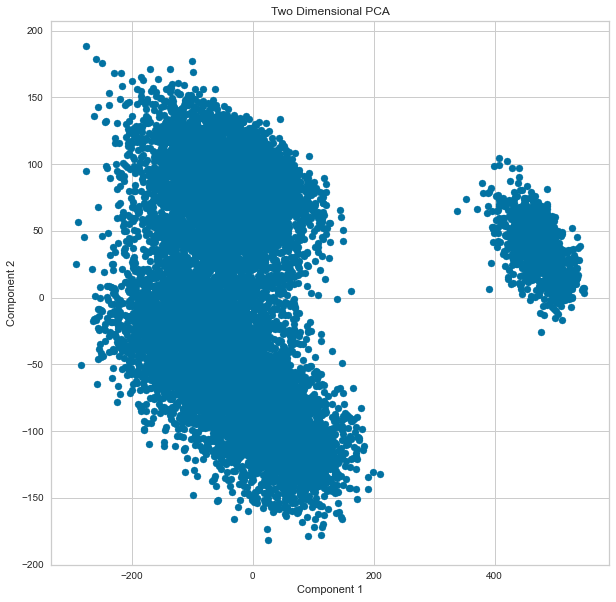

In [313]:
# Visualizing PCA in 2 Dimensions. (c = y_kmeans, s=10)

plt.figure()
plt.figure(figsize=(10,10))

plt.title('Two Dimensional PCA')
plt.xlabel('Component 1')
plt.ylabel('Component 2')

plt.scatter(PCA_dataset1['component1'], PCA_dataset1['component2'])
plt.show()

##### Interestingly, we see a large piece of scattering (to the left) which looks made up of 2 separate clusters and a more minor, distant part of scatter. Considering this information, let dig deeper into how many groups are needed.

In [314]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 1)
y_kmeans = kmeans.fit_predict(prc_comps1)

In [315]:
model = KMeans()
fig = KElbowVisualizer(model,k=(1,10))
fig.fit(dfcluster[dfcluster.columns[~dfcluster.columns.isin(['GPOS', 'BMI', 'eGPOS'])]])
fig.show();

In [316]:
dfcluster['principal component 1'] = p_component1
dfcluster['principal component 2'] = p_component2
dfcluster['cluster'] = y_kmeans

In [317]:
#Visualizaing Clusters

In [318]:
plt.figure(figsize=(10,7))
plt.scatter(prc_comps1[y_kmeans == 0, 0], prc_comps1[y_kmeans == 0, 1], s = 100, c = 'blue', label = 'Cluster 1')
plt.scatter(prc_comps1[y_kmeans == 1, 0], prc_comps1[y_kmeans == 1, 1], s = 100, c = 'red', label = 'Cluster 2')
plt.scatter(prc_comps1[y_kmeans == 2, 0], prc_comps1[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(prc_comps1[y_kmeans == 3, 0], prc_comps1[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 25, c = 'yellow', label = 'Centroids')

plt.title('Clusters of Players')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()

plt.show()

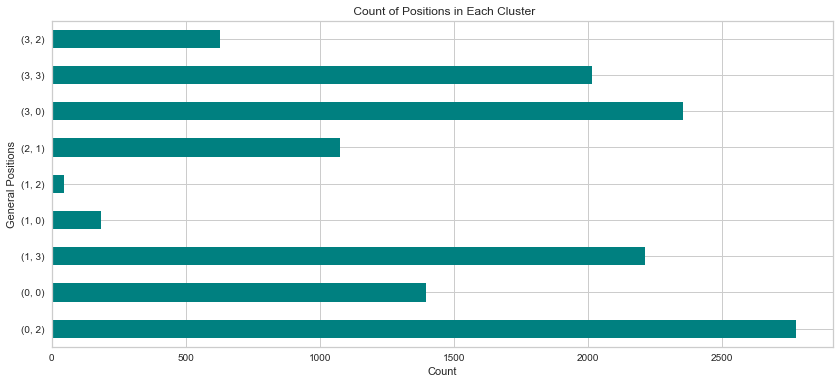

In [319]:
dfcluster.groupby("GPOS")["cluster"].value_counts().plot(kind="barh",color="teal",figsize=(14,6))

plt.title(' Count of Positions in Each Cluster')
plt.ylabel('General Positions')
plt.xlabel('Count')

plt.show()

In [320]:
pd.crosstab( index=dfcluster['cluster'],columns=dfcluster['GPOS'])

GPOS        0     1     2     3
cluster                        
0        1396   183     0  2355
1           0     0  1077     0
2        2775    47     0   627
3           0  2214     0  2017

#### It seems as if our clusters generally form/mostly around each player position. Given the attributes fed to the model and the discerning of the four groups, we can confidently say that players along the borders of the three neighboring clusters are position-fluid. This means that we can potentially try to find 'well-rounded' players along that general area and perhaps between the centroids of the three clusters.

In [321]:
#Normalizing 'Value'
target = np.log1p(df_copy['Value'])
original_target = df_copy['Value']
df_copy = df_copy.drop(['Value'], axis=1)

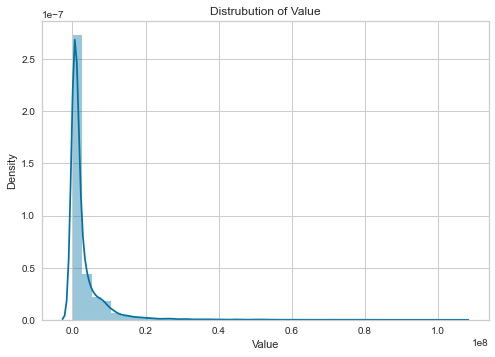

In [322]:
#'Value' is un-normal, and is skewed to the right
sns.distplot(original_target, bins=40)
plt.title('Distrubution of Value')
plt.show()

# With different view using matplt -- plt.hist(original_target,color='blue')

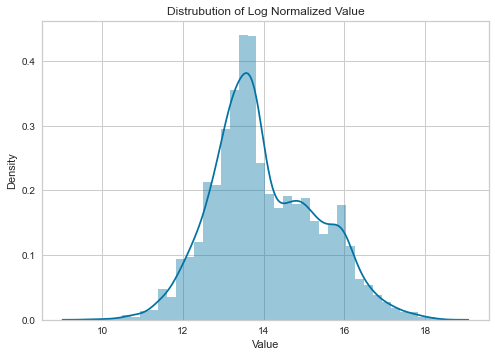

In [323]:
#However, 'Value' is log normal.
sns.distplot(target, bins=40)
plt.title('Distrubution of Log Normalized Value')
plt.show()

#### And now, it is time to do some Linear Regression, and Train/Test Split our data set.

In [324]:
scaler = MinMaxScaler()

X = df_copy.copy()
y = target.copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=99, shuffle=True)

X_train = scaler.fit_transform(X_train)

X_test = scaler.fit_transform(X_test)

In [331]:
reg = LinearRegression()
reg.fit(X_train,y_train)
pred = reg.predict(X_train)
scores = cross_val_score(reg,X,y)
pred_1 = reg.predict(X_test)
respred = (np.expm1(pred_1))
restrue = (np.expm1(y_test))

#Defining MAPE function
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape
#Real value MAPE
LR_MAPE= MAPE(y_test,pred_1)

print('MAPE:', '{:0.3f}'.format(LR_MAPE)+'%')
print('Train r2 Score:','{:0.3f}'.format(reg.score(X_train, y_train)*100)+'%')
print('Test r2 Score:','{:0.3f}'.format(reg.score(X_test, y_test)*100))
print('Adjusted r2 Score:','{:0.3f}'.format((1-((1-reg.score(X_test, y_test)*100)*((4188-1))/(4188-35-1))))+'%')
print('MSE:', mean_squared_error(y_true=restrue, y_pred=respred,squared=True))
print('RMSE:', mean_squared_error(restrue, respred,squared=False))
print('MAE:', mean_absolute_error(restrue, respred))

respred = np.array(np.expm1(pred_1)).reshape(-1,1)
restrue = np.array(np.expm1(y_test)).reshape(-1,1)
print('Cross Validation Score:','{:0.3f}'.format(cross_val_score(reg,restrue,respred,cv=2).mean()*100)+'%')

MAPE: 1.274%
Train r2 Score: 96.791%
Test r2 Score: 96.688
Adjusted r2 Score: 97.494%
MSE: 12747306809622.143
RMSE: 3570337.0722695277
MAE: 716693.0674474064
Cross Validation Score: 91.488%


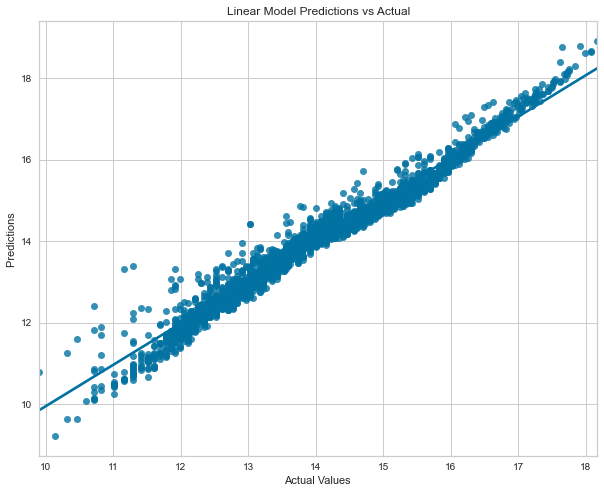

In [332]:
plt.figure(figsize=(10,8))
sns.regplot(x=y_test, y=pred_1)
plt.xlabel('Actual Values ')
plt.ylabel('Predictions ')
plt.title('Linear Model Predictions vs Actual')
plt.show()

In [328]:
random = RandomForestRegressor()

random.fit(X_train, y_train)

y_pred = random.predict(X_test)

In [329]:
RF_MAPE = MAPE((y_test),(y_pred))

y_pred1 = np.array(np.expm1(y_pred)).reshape(-1,1)
y_test1 = np.array(np.expm1(y_test)).reshape(-1,1)

cvs=cross_val_score(random,y_test1,y_pred1).mean()

In [330]:
print('Train r2 Score:',random.score(X_train, y_train))
print('Test r2 Score:',random.score(X_test, y_test))
print('Adjusted r2 Score:',(1-((1-random.score(X_test, y_test))*((4188-1))/(4188-35-1))))
print('MSE:', mean_squared_error(y_true=y_test1, y_pred=y_pred1,squared=True))
print('RMSE:', mean_squared_error(y_true=y_test1, y_pred=y_pred1,squared=False))
print('MAE:', mean_absolute_error(y_test1, y_pred1))
print('MAPE:', RF_MAPE)
print('Cross Validation Score:',cvs)

Train r2 Score: 0.9993610163225356
Test r2 Score: 0.9887006290568422
Adjusted r2 Score: 0.988605379060934
RMSE: 1034772.9254444635
MAE: 272857.12275194173
MAPE: 0.607470385929965
Cross Validation Score: 0.9764432765646205


In [333]:
plt.figure(figsize=(10,7))
sns.regplot(x=y_test, y=y_pred)

plt.xlabel('Actual Values ')
plt.ylabel('Predictions ')
plt.title('Random Forest Predictions vs Actual')

plt.show()

In [334]:
#Feature importance
importances = random.feature_importances_
importances

array([7.47507819e-02, 9.02320251e-01, 1.26544251e-02, 4.92067353e-04,
       1.71356078e-04, 1.61411319e-03, 2.29474027e-04, 1.92758677e-04,
       7.00223633e-04, 4.33597800e-04, 2.18512391e-04, 1.98660002e-04,
       1.83405655e-04, 4.76186567e-04, 1.72708700e-04, 1.79313587e-04,
       1.81266256e-04, 1.95700657e-04, 2.92186405e-04, 3.44084374e-04,
       7.74503516e-04, 2.43823114e-04, 3.92853631e-04, 1.85064117e-04,
       2.49434945e-04, 7.85342202e-04, 2.86642383e-04, 5.29094887e-04,
       2.42648692e-04, 6.18985188e-05, 2.78098493e-05, 2.19810360e-04])

In [335]:
features = df_copy.columns
imp = pd.DataFrame({'Features': features, 'Importance': importances})
imp.sort_values(by='Importance',ascending=False)

Features  Importance
1                OVA    0.902320
0                Age    0.074751
2             Growth    0.012654
5          Finishing    0.001614
25       Positioning    0.000785
20        Shot Power    0.000775
8            Volleys    0.000700
27         Penalties    0.000529
3          Attacking    0.000492
13      Ball Control    0.000476
9          Dribbling    0.000434
22        Long Shots    0.000393
19             Power    0.000344
18         Reactions    0.000292
26            Vision    0.000287
24        Aggression    0.000249
21           Stamina    0.000244
28         Composure    0.000243
6   Heading Accuracy    0.000229
31               PAC    0.000220
10             Curve    0.000219
11       FK Accuracy    0.000199
17           Agility    0.000196
7      Short Passing    0.000193
23         Mentality    0.000185
12      Long Passing    0.000183
16      Sprint Speed    0.000181
15      Acceleration    0.000179
14          Movement    0.000173
4           Crossing    0.000171
29                SM    0.000062
30                IR    0.000028

### The end! Thank you...

#### Well, not quite. I am still a bit curious about what if? We do not do a lot of those mambo jumbo stuff. 

#### So, maybe we start again by uploading the original data set to see the information without too much cleaning, less statistics stuff, and friendlier visualization.

In [336]:
# import the original data set
df = pd.read_csv('/Users/spicasumampouw/IronSpica/project/Project_FIFA_MoneyBall/Data/fifa21_male2.csv')

In [337]:
#create a clean money function
def clean_currency(x):
    if x.find("K") > -1 and x.find(".") == -1:
        return x.replace("K","000").replace("€","")
    elif x.find("K") > -1 and x.find(".") > -1:
        return x.replace("K","00").replace(".","").replace("€","")
    elif x.find("M") > -1 and x.find(".") == -1:
        return x.replace("M","000000").replace("€","")
    elif x.find("M") > -1 and x.find(".") > -1:
        return x.replace("M","00000").replace(".","").replace("€","")
    else:
        return x.replace("€","")
    return(x)

In [338]:
# Create a function to fill the empty integer types
cols_fill = ['Composure', 'Balance', 'Agility', 'Vision', 'Jumping', 'Volleys', 'Sliding Tackle', 'Curve', 'Positioning', 'Interceptions']
def fill_missing(df, cols_fill):
    for col in cols_fill:
        mean_val = df[col].mean()
        df[col] = df[col].fillna(mean_val)
    return df
data = fill_missing(df, cols_fill)
data.sort_values('Age',ascending=False).iloc[:5]

ID          Name  Age  OVA   Nationality          Club  BOV   BP  \
15737  254704      K. Miura   53   59         Japan   Yokohama FC   60   CF   
277     53985      S. Royce   47   48       England    Gillingham   48   GK   
1072   169108     L. Butrón   43   64          Peru  Alianza Lima   64   GK   
5062   208927  H. Sulaimani   43   64  Saudi Arabia       Al Ahli   66  CDM   
15576  254196  L. Fernández   42   61      Colombia      SD Aucas   61   GK   

      Position                                       Player Photo  \
15737       ST  https://cdn.sofifa.com/players/254/704/20_120.png   
277         GK  https://cdn.sofifa.com/players/053/985/20_120.png   
1072        GK  https://cdn.sofifa.com/players/169/108/20_120.png   
5062        LB  https://cdn.sofifa.com/players/208/927/20_120.png   
15576       GK  https://cdn.sofifa.com/players/254/196/20_120.png   

                                              Club Logo  \
15737  https://cdn.sofifa.com/teams/113197/light_60.png   
277      https://cdn.sofifa.com/teams/1802/light_60.png   
1072   https://cdn.sofifa.com/teams/111010/light_60.png   
5062   https://cdn.sofifa.com/teams/112387/light_60.png   
15576  https://cdn.sofifa.com/teams/110987/light_60.png   

                                    Flag Photo  POT           Team & Contract  \
15737      https://cdn.sofifa.com/flags/jp.png   59   Yokohama FC 2005 ~ 2021   
277    https://cdn.sofifa.com/flags/gb-eng.png   48    Gillingham 2019 ~ 2024   
1072       https://cdn.sofifa.com/flags/pe.png   64  Alianza Lima 2015 ~ 2020   
5062       https://cdn.sofifa.com/flags/sa.png   64       Al Ahli 2019 ~ 2024   
15576      https://cdn.sofifa.com/flags/co.png   61      SD Aucas 2018 ~ 2024   

      Height  Weight   foot  Growth        Joined Loan Date End Value  Wage  \
15737  5'10"  159lbs  Right       0   Jul 1, 2005           NaN    €0  €850   
277     6'2"  190lbs  Right       0   Oct 4, 2019           NaN   €3K  €700   
1072    6'0"  181lbs  Right       0   Jan 1, 2015           NaN  €45K  €500   
5062    5'8"  154lbs   Left       0  Jan 14, 2019           NaN    €0   €5K   
15576   6'2"  181lbs  Right       0  Jan 29, 2018           NaN  €25K  €500   

      Release Clause     Contract  Attacking  Crossing  Finishing  \
15737             €0  2005 ~ 2021        289        44         66   
277              €5K  2019 ~ 2024         76        15         14   
1072            €97K  2015 ~ 2020         69         7          9   
5062              €0  2019 ~ 2024        284        70         43   
15576           €54K  2018 ~ 2024         79        18         14   

       Heading Accuracy  Short Passing  Volleys  Skill  Dribbling  Curve  \
15737                56             61     62.0    290         63   69.0   
277                   9             27     11.0     91         10   13.0   
1072                 13             35      5.0     83          5   16.0   
5062                 61             67     43.0    333         63   69.0   
15576                11             22     14.0     86         16   19.0   

       FK Accuracy  Long Passing  Ball Control  Movement  Acceleration  \
15737           54            36            68       187            24   
277             11            30            27       145            12   
1072            12            25            25       180            22   
5062            69            68            64       281            41   
15576            9            21            21       190            39   

       Sprint Speed  Agility  Reactions  Balance  Power  Shot Power  Jumping  \
15737            26     27.0         48     62.0    235          59     32.0   
277              13     19.0         52     49.0    137          40     22.0   
1072             23     26.0         60     49.0    216          46     69.0   
5062             44     64.0         64     68.0    327          65     69.0   
15576            27     27.0         55     42.0    218          46     57.0   

      

### Starting with best players in the game

In [339]:
top_play=df[['Name','OVA',"Age",'Club','BP']]
top_play.sort_values(by='OVA',ascending=False,inplace=True)
top_30_play=top_play[:100]
fig=px.scatter(top_30_play,x='Age',y='OVA',color='Age',size='OVA',hover_data=['Name','Club','BP'],title='Top Football Players in the FIFA 21 game')
fig.show()

#### Observation remark: As per the above chart, and as expected, Messi and Cristiano Ronaldo are the best in the field by overall performance.

### Players value in the market against their wage

In [340]:
cost_prop=df[['Name','Club','Nationality','Wage','Value','BP']]
cost_prop['MultW']=np.where(cost_prop.Wage.str[-1]=='K',1000,1)
cost_prop['Wage']=cost_prop.Wage.str.strip('K')
cost_prop['Wage']=cost_prop.Wage.str.strip('€')
cost_prop['Wage']=pd.to_numeric(cost_prop['Wage'])
cost_prop['Wage in €']=cost_prop['Wage']*cost_prop['MultW']
cost_prop['MultV']=np.where(cost_prop.Value.str[-1]=='K',1000,np.where(cost_prop.Value.str[-1]=='M',1000000,1))
cost_prop['Value']=cost_prop.Value.str.strip('€')
cost_prop['Value']=cost_prop.Value.str.strip('K')
cost_prop['Value']=cost_prop.Value.str.strip('M')
cost_prop['Value']=pd.to_numeric(cost_prop['Value'])
cost_prop['Value in €']=cost_prop['Value']*cost_prop['MultV']
fig=px.scatter(cost_prop,x='Value in €',y='Wage in €',color='Value in €',size='Wage in €',hover_data=['Name','Club','Nationality','BP'],title='Value vs Wage Presentation of all the Players')
fig.show()

#### Observation remark: As per the above chart, Messi is the best in the field from our last graph, and it is well related to value and wage.

### Country with most presence in the game

In [341]:
nat_cnt=df.groupby('Nationality').apply(lambda x:x['Name'].count()).reset_index(name='Counts')
nat_cnt.sort_values(by='Counts',ascending=False,inplace=True)
top_10_nat_cnt=nat_cnt[:10]
fig=px.bar(top_10_nat_cnt,x='Nationality',y='Counts',color='Counts',title='Nationwise Representation in the FIFA Game')
fig.show()

#### Observation remark: Europe has the highest number of players in the FIFA game. One of the primary reasons in this regard is the EA franchise, which has the most user base in the EU predominately. Also, in FIFA, English, Bundesliga, and Spanish league has the most teams, generating the most players.

### Nationwise and average potential

In [342]:
cnt_best_avg=df.groupby('Nationality').apply(lambda x:np.average(x['OVA'])).reset_index(name='Overall Ratings')
cnt_best_cnt=df.groupby('Nationality').apply(lambda x:x['OVA'].count()).reset_index(name='Player Counts')
snt_best_avg_cnt=pd.merge(cnt_best_avg,cnt_best_cnt,how='inner',left_on='Nationality',right_on='Nationality')
sel_best_avg_cnt=snt_best_avg_cnt[snt_best_avg_cnt['Player Counts']>=200]
sel_best_avg_cnt.sort_values(by=['Overall Ratings','Player Counts'],ascending=[False,False])
px.scatter(sel_best_avg_cnt,x='Overall Ratings',y='Player Counts',color='Player Counts',size='Overall Ratings',hover_data=['Nationality'],title='Nationwise Player counts and Average Potential')

#### Observation remark: As per the above chart, England and Brazil worth mentioning because of their overall ratings and the players.

### Clubwise and average potential

In [343]:
cnt_best_avg=df.groupby('Club').apply(lambda x:np.average(x['OVA'])).reset_index(name='Overall Ratings')
cnt_best_cnt=df.groupby('Club').apply(lambda x:x['OVA'].count()).reset_index(name='Player Counts')
snt_best_avg_cnt=pd.merge(cnt_best_avg,cnt_best_cnt,how='inner',left_on='Club',right_on='Club')
sel_best_avg_cnt=snt_best_avg_cnt[snt_best_avg_cnt['Player Counts']>=25]
sel_best_avg_cnt.sort_values(by=['Overall Ratings','Player Counts'],ascending=[False,False])
px.scatter(sel_best_avg_cnt,x='Overall Ratings',y='Player Counts',color='Player Counts',size='Overall Ratings',hover_data=['Club'],title='Clubwise player counts and Average Potential')

#### Observation remark: As per the above chart, two teams deserve a special mention in this regard. Firstly is Bayern München - The team has the highest average rating among all the teams, 81 from 26 players. Another team is Manchester United- which has the highest average of 75 on the 45 players.

### Count of players from position wise

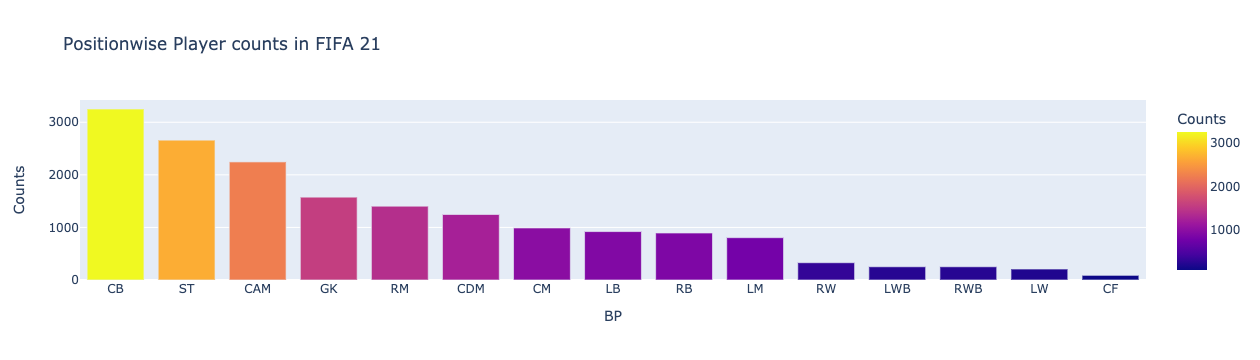

In [344]:
pos_cnt=df.groupby('BP').apply(lambda x:x['Name'].count()).reset_index(name='Counts')
pos_cnt.sort_values(by='Counts',ascending=False,inplace=True)
top_20_pos_cnt=pos_cnt[:20]
fig=px.bar(top_20_pos_cnt,x='BP',y='Counts',color='Counts',title='Positionwise Player counts in FIFA 21')
fig.show()

#### Observation remark: As per the above chart, we can observe the most position play in FIFA21.

### Age Distribution of the players

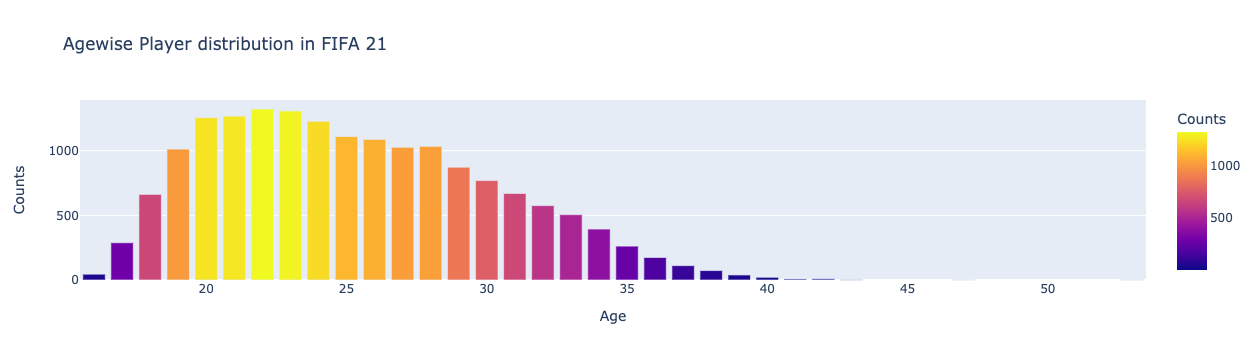

In [345]:
age_cnt=df.groupby('Age').apply(lambda x:x['Name'].count()).reset_index(name='Counts')
fig=px.bar(age_cnt,x='Age',y='Counts',color='Counts',title='Agewise Player distribution in FIFA 21')
fig.show()

#### Observation remarks: As per the above chart, it looks like a standard curve that is left-skewed. On average, 20-28 is the average age for most of the footballers in FIFA21.

### Distribution of age and potential for the young players

In [346]:
cond_1=df['OVA']!=df['POT']
cond_2=df['Age']<25
df_fil=df[cond_1 & cond_2]
pot_play=df_fil[['Name','Age','Nationality','Club','POT','BP','OVA','Value','Release Clause']]
pot_play.sort_values(by='POT',ascending=False,inplace=True)
top_pot_play=pot_play[:50]
fig=px.scatter(pot_play,x='Age',y='POT',size='POT',color='Age',hover_data=['Name','Age','Nationality','BP','OVA','Value','Release Clause'],title='Age vs Maximum Potential Distribution of the young Players')
fig.show()

#### Observation remark: As per the above chart, the team with the players with the highest potential. The potential cannot be equal to the Overall Score, and the age of the players must be younger than 25.

### The dream team by overall score

In [352]:
final_team=df[['Name','Age','OVA','BP','Club']]
final_team.sort_values(by='Age',inplace=True)
pos_play=final_team.groupby('BP').apply(lambda x:np.max(x['OVA'])).reset_index(name='Overall Score')
player_pos=pd.merge(final_team,pos_play,how='inner',left_on=['BP','OVA'],right_on=['BP','Overall Score']).sort_values('OVA',ascending=False)
pos_best=player_pos[['Name','Club','Age','BP','Overall Score']]
cm = sns.light_palette("teal", as_cmap=True)
pos_best.style.background_gradient(cmap=cm).set_precision(2)

### The young potential dream team below 25 by overall score.

In [358]:
final_team=df_fil[['Name','Age','POT','BP','Club']]
final_team.sort_values(by='Age',inplace=True)
pos_play=final_team.groupby('BP').apply(lambda x:np.max(x['POT'])).reset_index(name='Potential')
player_pos=pd.merge(final_team,pos_play,how='inner',left_on=['BP','POT'],right_on=['BP','Potential']).sort_values('POT',ascending=False)
pos_best=player_pos[['Name','Club','Age','BP','Potential']]
cm = sns.light_palette("green", as_cmap=True) 
pos_best.style.background_gradient(cmap=cm).set_precision(2)

#### Observation remark: These are the dream team of current and future players from their highest potential according to their overall score.

### Final observation remarks: The analysis has successfully answered all the questions and has provided an insight into the data and more. Information is everything; hence, we can create, model, and predict to have the best outcomes possible.